# 1 Lubbock ISD STAAR Analysis<a id='1_Lubbock_analysis'></a>

Next Steps:
1. Create data tables or graphs to show the subgroups for each school or district
2. Rank the performance schools (both by average score and most number of students not meeting) for math and reading
3. Demonstrate how far away each school was from the district average for math and reading
4. Create a profile image in the powerpoint - what is each student made up of
5. Use easy to understand terms like - an Asian student is 10x more likely to pass the 6th grade reading than a Black student in X school

## 1.1 Contents<a id='1.1_Contents'></a>
* [1 Lubbock ISD STAAR Analysis](#1_Lubbock_analysis)
  * [1.1 Contents](#1.1_Contents)
  * [1.2 Overview](#1.2_Overview)
    * [1.2.1 Context](#1.2.1_Context)
    * [1.2.2 Criteria for Success](#1.2.2_Criteria_for_Success)
    * [1.2.3 Scope and Constraints](#1.2.3_Scope)
    * [1.2.4 Stakeholders](#1.2.4_Stakeholders)
    * [1.2.5 Data Sources](#1.2.5_Data)
  * [1.3 Import Libraries](#1.3_Libraries)
  * [1.4 Load and Preview the Data](#1.4_Load)
  * [1.5 Clean and Prepare Data](#1.5_Clean)
    * [1.5.1 Data Types](#1.5.1_Data_types)
    * [1.5.2 Location Names and Totals](#1.5.2_Location)
    * [1.5.3 Merge Datasets](#1.5.3_Merge)
    * [1.5.4 Column Calculations](#1.5.4_Column_calculations)
    * [1.5.5 Column Names and Order](#1.5.5_Column_names)
    * [1.5.6 Dropping Rows](#1.5.6_Dropping_rows)
  * [1.6 Summary Statistics](#1.6_Summary_statistics)
  * [1.7 Modeling](#1.7_Modeling)
  * [1.8 Recommendations](#1.8_Recommendations)
  * [1.9 Summary](#1.9_Summary)

## 1.2 Overview<a id='1.2_Overview'></a>

The purpose of this project is to **identify a subset of middle schools in Lubbock ISD that have the greatest need for performance**.  

### 1.2.1 Context<a id='1.2.1_Context'></a>

Lubbock ISD has 11 middle schools including one juvenile detention facility. Of these schools, Smylie Wilson was closed in spring 2020 and McCool Academy opened in fall 2020; McCool is a choice school versus Wilson was a high-poverty boundary. Talkington is a choice school where students need to qualify.

The STAAR results for Texas schools were recently released; proficiency levels have remained consistent across years. Students are counted in multiple categories (i.e., approaches includes meets and masters; meets includes masters). 

### 1.2.2 Criteria for Success<a id='1.2.2_Criteria_for_Success'></a>

Success will identifying a subset of schools that have the greatest need for increased performance. 

### 1.2.3 Scope and Constraints<a id='1.2.3_Scope'></a>

The focus will be identifying high priority middle schools in Lubbock ISD using 20-21 and historical STAAR data. No additional data sources are considered; neither elementary or high schools are considered. Additionally, note that

- Data is available at the grade-level, not at the student level.
- Additional data, such as attendance, is not available for analysis.
- No data is available for SY19-20 due to the COVID pandemic.
- Math and literacy are tested for all grades; science is tested in 5th and 8th grade; social studies is tested in 8th grade only
- Any group with less than 5 students does not show results for privacy reasons

### 1.2.4 Stakeholders<a id='1.2.4_Stakeholders'></a>

The analysis will be presented to **Brian Eschbacher of Bell Creek Consulting** in a format appropriate for a cabinet meeting with the superintendent of Lubbock ISD. 

### 1.2.5 Data Sources<a id='1.2.5_Data'></a>

Data was gathered from two sources:

1. XLSX of historical data school-level provided by Brian Eschbacher (disaggregated by admin, grade, and EcoDis)
2. CSV downloaded from the [Data Interaction website](https://txreports.emetric.net/?domain=1&report=1) with the following specifications:
- Program: STAAR 3-8
- Report: Group Summary: Performance Levels
- Admin/Grade: 6, 7, 8 for Spring 2021 and Spring 2019
- Subject: Reading, Mathematics, Writing, Science, and Social Studies
- Organization: State, Lubbock ISD, Atkins MS, Cavazos MS, Commander William C. McCool Acad., Dunbar College Prep Acad., Evans MS, Hutchinson MS, Irons MS, Lubbock County Juvenile Justice Center, Mackenzie MS, Slaton MS, Smylie Wilson MS, Talkington School for Young Women Leaders
- Disaggreation: Gender, Ethnicity, Economically Disadvantaged, LEP, Special Education
- Other: Show N count for all performance bands; data transposed

## 1.3 Import Libriaries <a id='1.3_Libraries'></a>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## 1.4 Load and Preview the Data <a id='1.4_Load'></a>

In [2]:
# Read in the downloaded current data as df_current and the historical data as df_hist
df = pd.read_csv("report_final.csv", header = 1)
df_hist = pd.read_excel("Middle School State Proficiency Data.xlsx", header = 2)

In [3]:
df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id
0,LUBBOCK ISD,STAAR,Reading,Spring 2019,6,2130,1543,956,45,1174,55,592,28,273,13,152901
1,Male,STAAR,Reading,Spring 2019,6,1063,1524,525,49,538,51,237,22,101,10,152901
2,Female,STAAR,Reading,Spring 2019,6,1066,1563,431,40,635,60,355,33,172,16,152901
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1,-,-,-,-,-,-,-,-,-,152901
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300,1522,652,50,648,50,268,21,110,8,152901


In [4]:
df_hist.head()

,Org Id,Group,EcoDis (FRL) %,Admin,Grade,STAAR - Reading - Number Tested,STAAR - Reading - Average Scale Score,STAAR - Reading - Did Not Meet - %,STAAR - Reading - Approaches - %,STAAR - Reading - Meets - %,STAAR - Reading - Masters - %,STAAR - Mathematics - Number Tested,STAAR - Mathematics - Average Scale Score,STAAR - Mathematics - Did Not Meet - %,STAAR - Mathematics - Approaches - %,STAAR - Mathematics - Meets - %,STAAR - Mathematics - Masters - %
0,152901061,ATKINS M.S.,0.880524,Spring 2018,6,200,1516,48,52,18,6,201.0,1565.0,42.0,58.0,18.0,3.0
1,152901061,ATKINS M.S.,0.880524,Spring 2018,7,200,1580,49,52,25,8,200.0,1580.0,56.0,45.0,13.0,4.0
2,152901061,ATKINS M.S.,0.880524,Spring 2018,8,194,1633,33,67,28,10,166.0,1625.0,38.0,62.0,17.0,2.0
3,152901061,ATKINS M.S.,0.880524,Spring 2019,6,201,1514,51,49,17,6,201.0,1561.0,35.0,65.0,15.0,1.0
4,152901061,ATKINS M.S.,0.880524,Spring 2019,7,190,1579,43,57,24,12,191.0,1599.0,41.0,59.0,18.0,4.0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Group                3193 non-null   object
 1   Version              3193 non-null   object
 2   Subject              3193 non-null   object
 3   Admin                3193 non-null   object
 4   Grade                3193 non-null   int64 
 5   Number Tested        3193 non-null   int64 
 6   Average Scale Score  3193 non-null   object
 7   Did Not Meet - N     3193 non-null   object
 8   Did Not Meet - %     3193 non-null   object
 9   Approaches - N       3193 non-null   object
 10  Approaches - %       3193 non-null   object
 11  Meets - N            3193 non-null   object
 12  Meets - %            3193 non-null   object
 13  Masters - N          3193 non-null   object
 14  Masters - %          3193 non-null   object
 15  Org Id               3193 non-null   int64 
dtypes: int

In [6]:
df.columns

Index(['Group', 'Version', 'Subject', 'Admin', 'Grade', 'Number Tested',
       'Average Scale Score', 'Did Not Meet - N', 'Did Not Meet - %',
       'Approaches - N', 'Approaches - %', 'Meets - N', 'Meets - %',
       'Masters - N', 'Masters - %', 'Org Id'],
      dtype='object')

In [7]:
df_hist.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 89 entries, 0 to 88
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Org Id                                     89 non-null     int64  
 1   Group                                      89 non-null     object 
 2   EcoDis (FRL) %                             87 non-null     float64
 3   Admin                                      89 non-null     object 
 4   Grade                                      89 non-null     int64  
 5   STAAR - Reading - Number Tested            89 non-null     int64  
 6   STAAR - Reading - Average Scale Score      89 non-null     int64  
 7   STAAR - Reading - Did Not Meet - %         89 non-null     int64  
 8   STAAR - Reading - Approaches - %           89 non-null     int64  
 9   STAAR - Reading - Meets - %                89 non-null     int64  
 10  STAAR - Reading - Masters - 

## 1.5 Clean and Prepare Data <a id='1.5_Clean'></a>

### 1.5.1 Data Types <a id='1.5.1_Data_types'></a>

Based on df.info() above, the data types for all score-related columns (6-14) need to be changed to numeric.

In [8]:
# Change the data types to numeric for all scores
score_cols = ['Average Scale Score', 'Did Not Meet - N', 'Did Not Meet - %',
       'Approaches - N', 'Approaches - %', 'Meets - N', 'Meets - %',
       'Masters - N', 'Masters - %']

df[score_cols] = df[score_cols].apply(pd.to_numeric, errors='coerce')

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3193 entries, 0 to 3192
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Group                3193 non-null   object 
 1   Version              3193 non-null   object 
 2   Subject              3193 non-null   object 
 3   Admin                3193 non-null   object 
 4   Grade                3193 non-null   int64  
 5   Number Tested        3193 non-null   int64  
 6   Average Scale Score  2428 non-null   float64
 7   Did Not Meet - N     2428 non-null   float64
 8   Did Not Meet - %     2428 non-null   float64
 9   Approaches - N       2428 non-null   float64
 10  Approaches - %       2428 non-null   float64
 11  Meets - N            2428 non-null   float64
 12  Meets - %            2428 non-null   float64
 13  Masters - N          2428 non-null   float64
 14  Masters - %          2428 non-null   float64
 15  Org Id               3193 non-null   i

### 1.5.2 Location Names and Totals <a id='1.5.2_Location'></a>

For readability and grouping, the "Org Id: numbers in df should be replaced with the names of the locations. Also, the locations in the "Group" column are actually totals and should be renamed as total (the location name will be in the "Org Id" column).

For df_hist, values the "Org Id" column can be replaced with the same location names; the "Group" column can be dropped.

In [9]:
# Replace Org ID columns with names of locations
location_dict = {0: 'State',
                152901: 'Lubbock',
                152901061: 'Atkins',
                152901062: 'Cavazos',
                152901063: 'Dunbar',
                152901064: 'Evans',
                152901065: 'Hutchinson',
                152901066: 'Irons',
                152901067: 'Mackenzie',
                152901068: 'Slaton',
                152901069: 'Smylie',
                152901024: 'Talkington',
                152901070: 'McCool',
                152901017: 'Juvenile Detention'}

df.replace({'Org Id': location_dict}, inplace = True)

df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id
0,LUBBOCK ISD,STAAR,Reading,Spring 2019,6,2130,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock
1,Male,STAAR,Reading,Spring 2019,6,1063,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock
2,Female,STAAR,Reading,Spring 2019,6,1066,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock


In [10]:
# Replace locations in the group column with "Total"
total_dict = {'LUBBOCK ISD': 'Total', 
              'ATKINS M.S.': 'Total',
              'CAVAZOS M.S.': 'Total', 
              'COMMANDER WILLIAM C. MCCOOL ACAD.': 'Total',
              'DUNBAR COLLEGE PREP. ACAD.': 'Total', 
              'EVANS M.S.': 'Total', 
              'HUTCHINSON M.S.': 'Total',
              'IRONS M.S.': 'Total', 
              'LUBBOCK COUNTY JUVENILE JUSTICE CENTER': 'Total',
              'MACKENZIE M.S.': 'Total', 
              'SLATON M.S.': 'Total', 
              'SMYLIE WILSON M.S.': 'Total',
              'TALKINGTON SCHOOL FOR YOUNG WOMEN LEADERS': 'Total',
             'State': 'Total'}

df.replace({'Group': total_dict}, inplace = True)

df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id
0,Total,STAAR,Reading,Spring 2019,6,2130,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock
1,Male,STAAR,Reading,Spring 2019,6,1063,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock
2,Female,STAAR,Reading,Spring 2019,6,1066,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock


In [11]:
# Replace Org ID columns with names of locations
df_hist.replace({'Org Id': location_dict}, inplace = True)

df_hist.head()

,Org Id,Group,EcoDis (FRL) %,Admin,Grade,STAAR - Reading - Number Tested,STAAR - Reading - Average Scale Score,STAAR - Reading - Did Not Meet - %,STAAR - Reading - Approaches - %,STAAR - Reading - Meets - %,STAAR - Reading - Masters - %,STAAR - Mathematics - Number Tested,STAAR - Mathematics - Average Scale Score,STAAR - Mathematics - Did Not Meet - %,STAAR - Mathematics - Approaches - %,STAAR - Mathematics - Meets - %,STAAR - Mathematics - Masters - %
0,Atkins,ATKINS M.S.,0.880524,Spring 2018,6,200,1516,48,52,18,6,201.0,1565.0,42.0,58.0,18.0,3.0
1,Atkins,ATKINS M.S.,0.880524,Spring 2018,7,200,1580,49,52,25,8,200.0,1580.0,56.0,45.0,13.0,4.0
2,Atkins,ATKINS M.S.,0.880524,Spring 2018,8,194,1633,33,67,28,10,166.0,1625.0,38.0,62.0,17.0,2.0
3,Atkins,ATKINS M.S.,0.880524,Spring 2019,6,201,1514,51,49,17,6,201.0,1561.0,35.0,65.0,15.0,1.0
4,Atkins,ATKINS M.S.,0.880524,Spring 2019,7,190,1579,43,57,24,12,191.0,1599.0,41.0,59.0,18.0,4.0


In [12]:
# Drop the Group column
df_hist.drop(columns='Group', inplace = True)

df_hist.head()

,Org Id,EcoDis (FRL) %,Admin,Grade,STAAR - Reading - Number Tested,STAAR - Reading - Average Scale Score,STAAR - Reading - Did Not Meet - %,STAAR - Reading - Approaches - %,STAAR - Reading - Meets - %,STAAR - Reading - Masters - %,STAAR - Mathematics - Number Tested,STAAR - Mathematics - Average Scale Score,STAAR - Mathematics - Did Not Meet - %,STAAR - Mathematics - Approaches - %,STAAR - Mathematics - Meets - %,STAAR - Mathematics - Masters - %
0,Atkins,0.880524,Spring 2018,6,200,1516,48,52,18,6,201.0,1565.0,42.0,58.0,18.0,3.0
1,Atkins,0.880524,Spring 2018,7,200,1580,49,52,25,8,200.0,1580.0,56.0,45.0,13.0,4.0
2,Atkins,0.880524,Spring 2018,8,194,1633,33,67,28,10,166.0,1625.0,38.0,62.0,17.0,2.0
3,Atkins,0.880524,Spring 2019,6,201,1514,51,49,17,6,201.0,1561.0,35.0,65.0,15.0,1.0
4,Atkins,0.880524,Spring 2019,7,190,1579,43,57,24,12,191.0,1599.0,41.0,59.0,18.0,4.0


### 1.5.3 Merge Datasets <a id='1.5.3_Merge'></a>

Merge the two data sets by 
1. Store the EcoDis data in a separate dataframe
2. Remove the Spring 2021 and Spring 2019 data from the historical dataset
3. Add missing columns to historical data sets
4. Manipulate historical data to align with current data
5. Merge the historical and current datasets
6. Merge the EcoDis data back

In [13]:
# Create a dataframe from the historical data that has the location, ecodis, admin, and grade
df_ecodis = df_hist.iloc[:, 0:4]

In [14]:
# Drop the Spring 2021 and Spring 2019 data from the historical data set
df_hist = df_hist.loc[(df_hist['Admin'] == 'Spring 2018')]

df_hist.head()

,Org Id,EcoDis (FRL) %,Admin,Grade,STAAR - Reading - Number Tested,STAAR - Reading - Average Scale Score,STAAR - Reading - Did Not Meet - %,STAAR - Reading - Approaches - %,STAAR - Reading - Meets - %,STAAR - Reading - Masters - %,STAAR - Mathematics - Number Tested,STAAR - Mathematics - Average Scale Score,STAAR - Mathematics - Did Not Meet - %,STAAR - Mathematics - Approaches - %,STAAR - Mathematics - Meets - %,STAAR - Mathematics - Masters - %
0,Atkins,0.880524,Spring 2018,6,200,1516,48,52,18,6,201.0,1565.0,42.0,58.0,18.0,3.0
1,Atkins,0.880524,Spring 2018,7,200,1580,49,52,25,8,200.0,1580.0,56.0,45.0,13.0,4.0
2,Atkins,0.880524,Spring 2018,8,194,1633,33,67,28,10,166.0,1625.0,38.0,62.0,17.0,2.0
9,Cavazos,0.988909,Spring 2018,6,175,1500,57,43,14,4,174.0,1611.0,24.0,76.0,33.0,9.0
10,Cavazos,0.988909,Spring 2018,7,199,1578,49,51,20,11,198.0,1606.0,45.0,55.0,22.0,6.0


In [15]:
# Separate the math, reading, and meta data
df_hist_reading = df_hist.iloc[:, 4:10]
df_hist_math = df_hist.iloc[:, 10:16]
df_hist_meta= df_hist.iloc[:, 0:4]

# Add missing columns
df_hist_reading['Subject'] = 'Reading'
df_hist_math['Subject'] = 'Mathematics'
df_hist_reading['Version'] = 'STAAR'
df_hist_math['Version'] = 'STAAR'
df_hist_reading['Group'] = 'Total'
df_hist_math['Group'] = 'Total'

# Add meta data to math and reading separately
df_hist_math_complete = df_hist_math.join(df_hist_meta, how='outer')
df_hist_reading_complete = df_hist_reading.join(df_hist_meta, how='outer')


In [16]:
# Rename math columns without math
df_hist_math_complete.rename(columns = {'STAAR - Mathematics - Number Tested': 'Number Tested',
                                        'STAAR - Mathematics - Average Scale Score':'Average Scale Score',
                                        'STAAR - Mathematics - Did Not Meet - %':'Did Not Meet - %',
                                        'STAAR - Mathematics - Approaches - %': 'Approaches - %',
                                        'STAAR - Mathematics - Meets - %': 'Meets - %', 
                                        'STAAR - Mathematics - Masters - %': 'Masters - %'}, inplace = True)

In [17]:
# Rename reading columns without reading
df_hist_reading_complete.rename(columns = {'STAAR - Reading - Number Tested': 'Number Tested',
                                        'STAAR - Reading - Average Scale Score':'Average Scale Score',
                                        'STAAR - Reading - Did Not Meet - %':'Did Not Meet - %',
                                        'STAAR - Reading - Approaches - %': 'Approaches - %',
                                        'STAAR - Reading - Meets - %': 'Meets - %', 
                                        'STAAR - Reading - Masters - %': 'Masters - %'}, inplace = True)

In [18]:
# Drop the EcoDis columns
df_hist_math_complete.drop(columns='EcoDis (FRL) %', inplace = True)
df_hist_reading_complete.drop(columns='EcoDis (FRL) %', inplace = True)

In [19]:
# Concatenate the math and reading dataframes
df_hist_complete = pd.concat([df_hist_math_complete, df_hist_reading_complete])

In [20]:
# Reorder the columns in df_hist_complete to concat with df
cols_hist = df_hist_complete.columns.tolist()

cols_hist = ['Group', 'Version', 'Subject', 'Admin', 'Grade', 'Number Tested',
       'Average Scale Score', 'Did Not Meet - %', 'Approaches - %',
       'Meets - %', 'Masters - %', 'Org Id']

df_hist_complete = df_hist_complete[cols_hist]

In [21]:
df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id
0,Total,STAAR,Reading,Spring 2019,6,2130,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock
1,Male,STAAR,Reading,Spring 2019,6,1063,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock
2,Female,STAAR,Reading,Spring 2019,6,1066,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock


In [22]:
# Concatenate the two dataframes
df = pd.concat([df, df_hist_complete])

In [23]:
df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id
0,Total,STAAR,Reading,Spring 2019,6,2130.0,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock
1,Male,STAAR,Reading,Spring 2019,6,1063.0,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock
2,Female,STAAR,Reading,Spring 2019,6,1066.0,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300.0,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock


In [24]:
# Merge the EcoDis data back (note that EcoDis is not available at the state or district levels)
df = pd.merge(df, df_ecodis, how='left')

### 1.5.4 Column Calculations <a id='1.5.4_Column_calculations'></a>

To better understand the number of students in each band (e.g., approaches, meets), new columns must be created from the current bands that only include students in that band.

Also, a "Check" column should be created to ensure the total of all four bands is 100%.

Columns should also be created for the total number of students in each band to allow for accurate averages across grades.

In [25]:
# Separate out the scores into each of the groups
#df['Meets_%'] = df['Meets - %'] - df['Masters - %']
#df['Approaches_%'] = df['Approaches - %'] - df['Meets - %']
#df['Check_%'] = df['Did Not Meet - %'] + df['Approaches_%'] + df['Meets_%'] + df['Masters - %']

df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Org Id,EcoDis (FRL) %
0,Total,STAAR,Reading,Spring 2019,6,2130.0,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock,NaN
1,Male,STAAR,Reading,Spring 2019,6,1063.0,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock,NaN
2,Female,STAAR,Reading,Spring 2019,6,1066.0,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock,NaN
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock,NaN
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300.0,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock,NaN


To confirm that all rows are 100% for any group with 5 or more students, filter for any that are not 100% (not that this filter is not run for readability - **the check confirmed that the only rows remaining were at 101%, which is likey due to rounding**.

In [26]:
# Confirm all rows equal 100% in check column for number tested being greater than or equal to 5 (threshold for displaying results)
#df[(df['Check_%'] != 100) & (df['Number Tested'] >= 5)]

In [27]:
# For Spring 2018, create columns to estimate the number of students in each band
#for row in df['Admin']:
   # if row == 'Spring 2018':
       # df['Did Not Meet - N'] = (df['Did Not Meet - %']/100) * df['Number Tested']
       # df['Approaches - N'] = (df['Approaches - %']/100) * df['Number Tested']
       # df['Meets - N'] = (df['Meets - %']/100) * df['Number Tested']
       # df['Masters - N'] = (df['Masters - %']/100) * df['Number Tested']


### 1.5.5 Column Names and Order <a id='1.5.5_Column_names'></a>

For readablity and and consistency, the columns should be renamed and put in a more appropriate order.

In [28]:
# Remove unnecessary columns and rename the did not meet and masters columns
#df.rename(columns = {'Did Not Meet - %':'Did Not Meet_%', 'Masters - %':'Masters_%', 'Org Id': 'Location',
                    #'Did Not Meet - N':'Did Not Meet_N', 'Approaches - N': 'Approaches_N', 'Meets - N': 'Meets_N',
                    #'Masters - N': 'Masters_N', 'EcoDis (FRL) %': 'EcoDis_%'}, inplace = True)

#df.drop(['Approaches - %', 'Meets - %', 'Check_%'], axis=1, inplace = True)

df.rename(columns = {'Org Id': 'Location'}, inplace = True)

df.head()

,Group,Version,Subject,Admin,Grade,Number Tested,Average Scale Score,Did Not Meet - N,Did Not Meet - %,Approaches - N,Approaches - %,Meets - N,Meets - %,Masters - N,Masters - %,Location,EcoDis (FRL) %
0,Total,STAAR,Reading,Spring 2019,6,2130.0,1543.0,956.0,45.0,1174.0,55.0,592.0,28.0,273.0,13.0,Lubbock,NaN
1,Male,STAAR,Reading,Spring 2019,6,1063.0,1524.0,525.0,49.0,538.0,51.0,237.0,22.0,101.0,10.0,Lubbock,NaN
2,Female,STAAR,Reading,Spring 2019,6,1066.0,1563.0,431.0,40.0,635.0,60.0,355.0,33.0,172.0,16.0,Lubbock,NaN
3,No Gender Provided,STAAR,Reading,Spring 2019,6,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Lubbock,NaN
4,Hispanic/Latino,STAAR,Reading,Spring 2019,6,1300.0,1522.0,652.0,50.0,648.0,50.0,268.0,21.0,110.0,8.0,Lubbock,NaN


In [29]:
# Reorder the columns for easier review
cols = ['Location',
    'Group',
        'Version',
        'Subject',
        'Admin',
        'Grade',
        'EcoDis (FRL) %',
        'Number Tested',
        'Average Scale Score',
       'Did Not Meet - %',
       'Approaches - %',
       'Meets - %',
       'Masters - %',
       'Did Not Meet - N',
       'Approaches - N',
       'Meets - N',
       'Masters - N']

df = df[cols]

df.head()

,Location,Group,Version,Subject,Admin,Grade,EcoDis (FRL) %,Number Tested,Average Scale Score,Did Not Meet - %,Approaches - %,Meets - %,Masters - %,Did Not Meet - N,Approaches - N,Meets - N,Masters - N
0,Lubbock,Total,STAAR,Reading,Spring 2019,6,NaN,2130.0,1543.0,45.0,55.0,28.0,13.0,956.0,1174.0,592.0,273.0
1,Lubbock,Male,STAAR,Reading,Spring 2019,6,NaN,1063.0,1524.0,49.0,51.0,22.0,10.0,525.0,538.0,237.0,101.0
2,Lubbock,Female,STAAR,Reading,Spring 2019,6,NaN,1066.0,1563.0,40.0,60.0,33.0,16.0,431.0,635.0,355.0,172.0
3,Lubbock,No Gender Provided,STAAR,Reading,Spring 2019,6,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Lubbock,Hispanic/Latino,STAAR,Reading,Spring 2019,6,NaN,1300.0,1522.0,50.0,50.0,21.0,8.0,652.0,648.0,268.0,110.0


### 1.5.6 Dropping Rows <a id='1.5.6_Dropping_rows'></a>

Given that the dataset does not include results for student groups with less than five students, those rows should be dropped.

In [30]:
# Drop all rows where the Average Scale Score is not reported (i.e., NaN)
df.dropna(subset = ['Average Scale Score'], inplace = True)

## 1.6 Summary Statistics <a id='1.6_Summary_statistics'></a>

Start with who took the exam in the district in 2021

In [31]:
#Subset the df to see scores in 2021 at the grade-level
df_21 = df['Admin'] == 'Spring 2021'
df_total = df['Group'] == 'Total'
df_core = (df['Subject'] == 'Mathematics') | (df['Subject'] == 'Reading')
df_reading = df['Subject'] == 'Reading'
df_math = df['Subject'] == 'Mathematics'
df_6 = df['Grade'] == 6
df_7 = df['Grade'] == 7
df_8 = df['Grade'] == 8
df_21_total_core = df[df_21 & df_total & df_core]
df_21_total_reading = df[df_21 & df_total & df_reading]
df_21_total_math = df[df_21 & df_total & df_math]
df_21_total_6 = df[df_21 & df_total & df_6]
df_21_total_7 = df[df_21 & df_total & df_7]
df_21_total_8 = df[df_21 & df_total & df_8]


In [32]:
# Create lists for only the schools and all locations
schools = ['Atkins', 'Cavazos', 'McCool', 'Dunbar','Evans', 'Hutchinson', 'Irons', 'Mackenzie','Slaton', 'Talkington'] # Note that the Juvenile facility and Smylie are dropped for low n and closure, respectively.
all_locations = ['State', 'Lubbock', 'Atkins', 'Cavazos', 'McCool', 'Dunbar', 'Evans', 'Hutchinson', 'Irons', 'Juvenile Detention', 'Mackenzie', 'Slaton', 'Smylie', 'Talkington']

In [33]:
# Create lists of all subgroup categories
ethnicity = ['Hispanic/Latino', 'American Indian or Alaskan Native', 'Asian', 'Black or African American', 'White', 'Two or More Races']
gender = ['Male', 'Female', 'No Gender Provided']
ecodis = ['Economically Disadvantaged', 'Not Economically Disadvantaged', 'No ED Info. Provided']
lep = ['Current LEP', 'Non-LEP (Monitored 1st Year)', 'Non-LEP (Monitored 2nd Year)', 'Non-LEP (Monitored 3rd Year)', 'Non-LEP (Monitored 4th Year)',
       'Other Non-LEP', 'No LEP Info. Provided', 'Non-LEP (Post Monitoring)']
sped = ['Special Education', 'Not Special Education', 'No Special Education Info. Provided']

In [34]:
# Check to see if two data frames are equal
#df_21_meets.merge(function_check,indicator = True, how='left').loc[lambda x : x['_merge']!='both']

## Ideas for Analysis
- Who is in the district? How different are the schools by race, SWD, EL, etc? Like a simple student profile
- How many students took the 2021 STAAR exams by school? How does that compare historically?
- Do students of color exist in disproporiate numbers in poverty schools?
- DROP rows with NaNs


Visuals or tables to create

- 

**Good content to add**
- Participation rate (why did so many more students take the reading exam than math?
- 

# Revised Analysis (7/17)

For math and literacy at the schools, how many students were proficient (meets/masters)?

1. 

In [35]:
# Create a function to filter the school, year, group, and subject - arguments are lists
def filter_school_year(school_list, year_list, subject_list, group_list):
    return df[(df['Location'].isin(school_list)) & 
              (df['Admin'].isin(year_list)) &
              (df['Subject'].isin(subject_list)) &
              (df['Group'].isin(group_list))]

In [36]:
# Create a function to create a dataframe of % at a score-band (e.g. Meets/Masters)
def calculate_threshold_per(df, score_band, year):
    year_threshold = (((df.groupby(['Location', 'Subject'])[score_band].sum())/(df.groupby(['Location', 'Subject'])['Number Tested'].sum())).round(3)*100).to_frame()
    if score_band == 'Meets - N':
        band = 'Meets/Masters'
    elif score_band == 'Did Not Meet - N':
        band = 'Did Not Meet'
    year_threshold.columns = [f"% {band} in {year}"]
    return year_threshold

In [68]:
# Create a function to graph a dataset with values
def graph_df(data, x, y, title):
    
    sns.set_theme(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 10))

    # Plot the proficiency
    sns.set_color_codes("bright")
    sns.barplot(x=x, y=y, data=data).set(ylabel=None, xlabel=None)
    sns.despine(left=True, bottom=True)
    ax.axes.set_title(title, fontsize=20)
    ax.axes.xaxis.set_ticks([])
    ax.axes.xaxis.set_ticklabels([])
    ax.tick_params(labelsize=12)

    # Display values
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.1f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment

In [69]:
#Calculate the percentage of students proficient in math at each school for 20-21
df_21_math_meets = calculate_threshold_per(
    filter_school_year(schools, ['Spring 2021'], ['Mathematics'], ['Total']),
    'Meets - N', 
    '20-21').sort_values(by='% Meets/Masters in 20-21', ascending = False).reset_index()

df_21_math_meets

,Location,Subject,% Meets/Masters in 20-21
0,Talkington,Mathematics,75.6
1,Hutchinson,Mathematics,49.2
2,McCool,Mathematics,39.0
3,Evans,Mathematics,27.3
4,Cavazos,Mathematics,22.6
5,Irons,Mathematics,20.3
6,Atkins,Mathematics,16.3
7,Mackenzie,Mathematics,13.3
8,Slaton,Mathematics,10.8
9,Dunbar,Mathematics,9.3


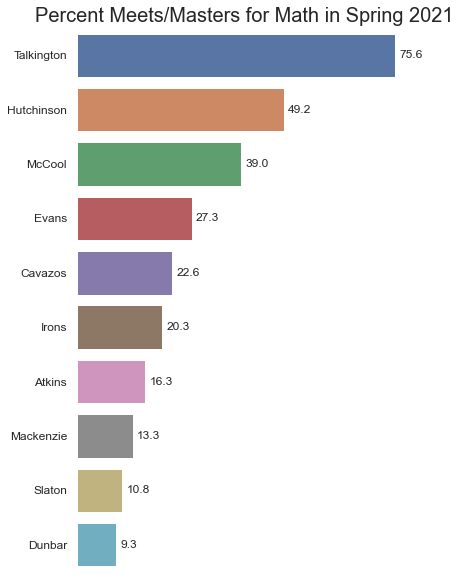

In [70]:
#Graph of the percentage of students proficient in math at each school for 20-21
graph_df(df_21_math_meets, '% Meets/Masters in 20-21', 'Location', 'Percent Meets/Masters for Math in Spring 2021')

In [40]:
#Calculate the percentage of students proficient in reading at each school for 20-21
df_21_reading_meets = calculate_threshold_per(
    filter_school_year(schools, ['Spring 2021'], ['Reading'], ['Total']),
    'Meets - N', 
    '20-21').sort_values(by='% Meets/Masters in 20-21', ascending = False).reset_index()

df_21_reading_meets

,Location,Subject,% Meets/Masters in 20-21
0,Talkington,Reading,73.4
1,Hutchinson,Reading,62.3
2,McCool,Reading,45.7
3,Evans,Reading,42.5
4,Irons,Reading,33.9
5,Atkins,Reading,28.1
6,Mackenzie,Reading,24.4
7,Cavazos,Reading,24.1
8,Slaton,Reading,16.3
9,Dunbar,Reading,16.0


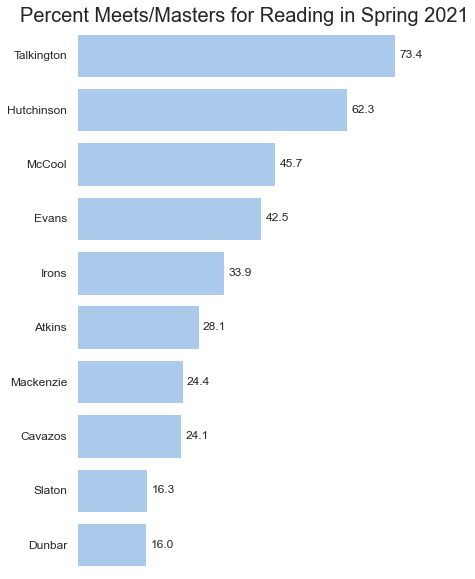

In [41]:
#Graph of the percentage of students proficient in reading at each school for 20-21
graph_df(df_21_reading_meets, '% Meets/Masters in 20-21', 'Location', 'Percent Meets/Masters for Reading in Spring 2021')

# What has historical proficiency looked like?

In [42]:
#Calculate the percentage of students proficient in math at each school for 18-19
df_19_math_meets = calculate_threshold_per(
    filter_school_year(schools, ['Spring 2019'], ['Mathematics'], ['Total']),
    'Meets - N', 
    '18-19').sort_values(by='% Meets/Masters in 18-19', ascending = False).reset_index()

df_19_math_meets

,Location,Subject,% Meets/Masters in 18-19
0,Talkington,Mathematics,72.1
1,Hutchinson,Mathematics,61.1
2,Evans,Mathematics,48.5
3,Irons,Mathematics,45.2
4,Cavazos,Mathematics,32.2
5,Dunbar,Mathematics,25.0
6,Atkins,Mathematics,24.8
7,Slaton,Mathematics,24.4
8,Mackenzie,Mathematics,22.7


In [43]:
#Calculate the percentage of students proficient in math at each school for 18-19
df_18_math_meets = calculate_threshold_per(
    filter_school_year(schools, ['Spring 2018'], ['Mathematics'], ['Total']),
    'Meets - N', 
    '17-18').sort_values(by='% Meets/Masters in 17-18', ascending = False).reset_index()

df_18_math_meets

,Location,Subject,% Meets/Masters in 17-18
0,Atkins,Mathematics,0.0
1,Cavazos,Mathematics,0.0
2,Dunbar,Mathematics,0.0
3,Evans,Mathematics,0.0
4,Hutchinson,Mathematics,0.0
5,Irons,Mathematics,0.0
6,Mackenzie,Mathematics,0.0
7,Slaton,Mathematics,0.0
8,Talkington,Mathematics,0.0


# Who took the exams in Spring 2021?
1. How many students at each school took the math exam? The reading exam?
2. How were each of the demographic groups (ethnicity, gender, ecodis, lep, and sped) were represented in the math and reading exams?

In [44]:
# Create a function to get the total number of test takers by group
def calculate_total_takers(df, year):
    total_takers = df.groupby(['Location', 'Subject','Group'])['Number Tested'].sum().to_frame()
    total_takers.columns = [f"Total Test Takers in {year}"]
    return total_takers

In [45]:
# Determine the total number of students who took the math exam in Spring 2021
df_21_math_total = calculate_total_takers(filter_school_year(schools, ['Spring 2021'], ['Mathematics'], ['Total']), '20-21').reset_index()

df_21_math_total

,Location,Subject,Group,Total Test Takers in 20-21
0,Atkins,Mathematics,Total,491.0
1,Cavazos,Mathematics,Total,504.0
2,Dunbar,Mathematics,Total,463.0
3,Evans,Mathematics,Total,750.0
4,Hutchinson,Mathematics,Total,687.0
5,Irons,Mathematics,Total,768.0
6,Mackenzie,Mathematics,Total,630.0
7,McCool,Mathematics,Total,267.0
8,Slaton,Mathematics,Total,435.0
9,Talkington,Mathematics,Total,176.0


In [46]:
# Determine the total number of students who took the reading exam in Spring 2021
df_21_reading_total = calculate_total_takers(filter_school_year(schools, ['Spring 2021'], ['Reading'], ['Total']), '20-21').reset_index()

df_21_reading_total

,Location,Subject,Group,Total Test Takers in 20-21
0,Atkins,Reading,Total,545.0
1,Cavazos,Reading,Total,523.0
2,Dunbar,Reading,Total,520.0
3,Evans,Reading,Total,896.0
4,Hutchinson,Reading,Total,836.0
5,Irons,Reading,Total,884.0
6,Mackenzie,Reading,Total,665.0
7,McCool,Reading,Total,267.0
8,Slaton,Reading,Total,460.0
9,Talkington,Reading,Total,267.0


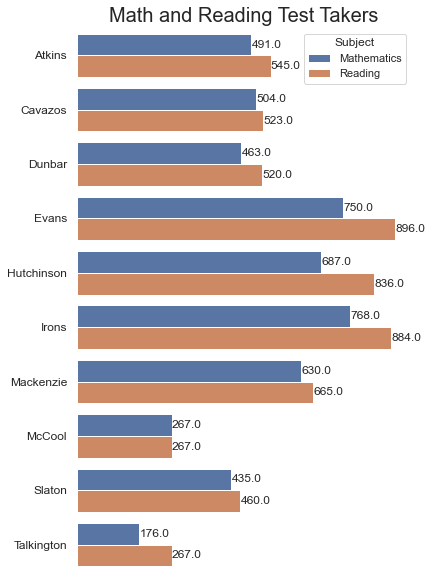

In [67]:
#Graph of the percentage of total students per subject for participation
df_21_total = calculate_total_takers(filter_school_year(schools, ['Spring 2021'], ['Reading','Mathematics'], ['Total']), '20-21').reset_index()

def graph_df_participation(data, x, y, title):
    
    sns.set_theme(style="whitegrid")

    # Initialize the matplotlib figure
    f, ax = plt.subplots(figsize=(6, 10))

    # Plot the proficiency
    sns.set_color_codes("colorblind")
    sns.barplot(x=x, y=y, data=data, hue='Subject').set(ylabel=None, xlabel=None)
    sns.despine(left=True, bottom=True)
    ax.axes.set_title(title, fontsize=20)
    ax.axes.xaxis.set_ticks([])
    ax.axes.xaxis.set_ticklabels([])
    ax.tick_params(labelsize=12)

    # Display values
    for p in ax.patches:
        width = p.get_width()    # get bar length
        ax.text(width + 1,       # set the text at 1 unit right of the bar
                p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
                '{:1.1f}'.format(width), # set variable to display, 2 decimals
                ha = 'left',   # horizontal alignment
                va = 'center')  # vertical alignment

graph_df_participation(df_21_total, 'Total Test Takers in 20-21', 'Location', 'Math and Reading Test Takers')

In [48]:
# Create a function to create a dataframe of total number and percentages for each group
def totals_percentages(admin, subject, group, year):
    total_df = calculate_total_takers(filter_school_year(schools, [admin], [subject], group), year).unstack().reset_index()
    total_df['Total'] = total_df.sum(axis=1)
    for x in group:
        try:
            total_df[f"Percent Test Takers in {year}", x] = (total_df[f"Total Test Takers in {year}", x]/total_df['Total']).round(3)*100
        except KeyError:
            continue
    return total_df

In [49]:
# Determine the total number and percentages of students by race who took the math exam in Spring 2021
df_21_math_race = totals_percentages('Spring 2021', 'Mathematics', ethnicity, '20-21')
df_21_math_race

Location      Subject Total Test Takers in 20-21  \
Group                                               Asian   
0          Atkins  Mathematics                        NaN   
1         Cavazos  Mathematics                        NaN   
2          Dunbar  Mathematics                        NaN   
3           Evans  Mathematics                        NaN   
4      Hutchinson  Mathematics                       50.0   
5           Irons  Mathematics                        NaN   
6       Mackenzie  Mathematics                        6.0   
7          McCool  Mathematics                        NaN   
8          Slaton  Mathematics                        NaN   
9      Talkington  Mathematics                        5.0   

                                                                          \
Group Black or African American Hispanic/Latino Two or More Races  White   
0                          84.0           363.0              10.0   30.0   
1                          38.0           445.0               NaN   12.0   
2                         211.0           232.0               5.0    NaN   
3                          89.0           411.0              18.0  222.0   
4                          45.0           361.0              15.0  212.0   
5                          92.0           420.0              24.0  222.0   
6                          93.0           407.0              17.0   93.0   
7                          30.0           138.0               6.0   80.0   
8                          52.0           348.0               NaN   30.0   
9                          21.0            81.0               NaN   61.0   

       Total Percent Test Takers in 20-21                                  \
Group                     Hispanic/Latino Asian Black or African American   
0      487.0                         74.5   NaN                      17.2   
1      495.0                         89.9   NaN                       7.7   
2      448.0                         51.8   NaN                      47.1   
3      740.0                         55.5   NaN                      12.0   
4      683.0                         52.9   7.3                       6.6   
5      758.0                         55.4   NaN                      12.1   
6      616.0                         66.1   1.0                      15.1   
7      254.0                         54.3   NaN                      11.8   
8      430.0                         80.9   NaN                      12.1   
9      168.0                         48.2   3.0                      12.5   

                               
Group White Two or More Races  
0       6.2               2.1  
1       2.4               NaN  
2       NaN               1.1  
3      30.0               2.4  
4      31.0               2.2  
5      29.3               3.2  
6      15.1               2.8  
7      31.5               2.4  
8       7.0               NaN  
9      36.3               NaN

In [50]:
# Determine the total number and percentages of students by gender who took the math exam in Spring 2021
df_21_math_gender = totals_percentages('Spring 2021', 'Mathematics', gender, '20-21')
df_21_math_gender

Location      Subject Total Test Takers in 20-21         Total  \
Group                                              Female   Male          
0          Atkins  Mathematics                      247.0  244.0  491.0   
1         Cavazos  Mathematics                      259.0  245.0  504.0   
2          Dunbar  Mathematics                      221.0  242.0  463.0   
3           Evans  Mathematics                      361.0  389.0  750.0   
4      Hutchinson  Mathematics                      358.0  329.0  687.0   
5           Irons  Mathematics                      373.0  395.0  768.0   
6       Mackenzie  Mathematics                      308.0  322.0  630.0   
7          McCool  Mathematics                      106.0  161.0  267.0   
8          Slaton  Mathematics                      198.0  237.0  435.0   
9      Talkington  Mathematics                      176.0    NaN  176.0   

      Percent Test Takers in 20-21         
Group                         Male Female  
0                             49.7   50.3  
1                             48.6   51.4  
2                             52.3   47.7  
3                             51.9   48.1  
4                             47.9   52.1  
5                             51.4   48.6  
6                             51.1   48.9  
7                             60.3   39.7  
8                             54.5   45.5  
9                              NaN  100.0

In [51]:
# Determine the total number and percentages of students by sped who took the math exam in Spring 2021
df_21_math_sped = totals_percentages('Spring 2021', 'Mathematics', sped, '20-21')
df_21_math_sped

Location      Subject Total Test Takers in 20-21                    \
Group                               Not Special Education Special Education   
0          Atkins  Mathematics                      419.0              72.0   
1         Cavazos  Mathematics                      430.0              74.0   
2          Dunbar  Mathematics                      362.0             101.0   
3           Evans  Mathematics                      664.0              86.0   
4      Hutchinson  Mathematics                      638.0              49.0   
5           Irons  Mathematics                      671.0              97.0   
6       Mackenzie  Mathematics                      539.0              91.0   
7          McCool  Mathematics                      243.0              24.0   
8          Slaton  Mathematics                      349.0              86.0   
9      Talkington  Mathematics                      176.0               NaN   

       Total Percent Test Takers in 20-21                        
Group                   Special Education Not Special Education  
0      491.0                         14.7                  85.3  
1      504.0                         14.7                  85.3  
2      463.0                         21.8                  78.2  
3      750.0                         11.5                  88.5  
4      687.0                          7.1                  92.9  
5      768.0                         12.6                  87.4  
6      630.0                         14.4                  85.6  
7      267.0                          9.0                  91.0  
8      435.0                         19.8                  80.2  
9      176.0                          NaN                 100.0

In [52]:
# Determine the total number and percentages of students by ecodis who took the math exam in Spring 2021
df_21_math_ecodis = totals_percentages('Spring 2021', 'Mathematics', ecodis, '20-21')
df_21_math_ecodis

Location      Subject Total Test Takers in 20-21  \
Group                          Economically Disadvantaged   
0          Atkins  Mathematics                      421.0   
1         Cavazos  Mathematics                      491.0   
2          Dunbar  Mathematics                      444.0   
3           Evans  Mathematics                      466.0   
4      Hutchinson  Mathematics                      338.0   
5           Irons  Mathematics                      502.0   
6       Mackenzie  Mathematics                      495.0   
7          McCool  Mathematics                      166.0   
8          Slaton  Mathematics                      387.0   
9      Talkington  Mathematics                       91.0   

                                      Total Percent Test Takers in 20-21  \
Group Not Economically Disadvantaged          Economically Disadvantaged   
0                               70.0  491.0                         85.7   
1                                5.0  496.0                         99.0   
2                               19.0  463.0                         95.9   
3                              284.0  750.0                         62.1   
4                              349.0  687.0                         49.2   
5                              266.0  768.0                         65.4   
6                              135.0  630.0                         78.6   
7                              101.0  267.0                         62.2   
8                               48.0  435.0                         89.0   
9                               85.0  176.0                         51.7   

                                      
Group Not Economically Disadvantaged  
0                               14.3  
1                                1.0  
2                                4.1  
3                               37.9  
4                               50.8  
5                               34.6  
6                               21.4  
7                               37.8  
8                               11.0  
9                               48.3

In [53]:
# Determine the total number and percentages of students by lep who took the math exam in Spring 2021
df_21_math_lep = totals_percentages('Spring 2021', 'Mathematics', lep, '20-21')
df_21_math_lep

Location      Subject Total Test Takers in 20-21  \
Group                                         Current LEP   
0          Atkins  Mathematics                       52.0   
1         Cavazos  Mathematics                       35.0   
2          Dunbar  Mathematics                       31.0   
3           Evans  Mathematics                        5.0   
4      Hutchinson  Mathematics                       52.0   
5           Irons  Mathematics                       13.0   
6       Mackenzie  Mathematics                       25.0   
7          McCool  Mathematics                        NaN   
8          Slaton  Mathematics                       41.0   
9      Talkington  Mathematics                        NaN   

                                                                            \
Group Non-LEP (Monitored 4th Year) Non-LEP (Post Monitoring) Other Non-LEP   
0                              NaN                       NaN         437.0   
1                              NaN                       NaN         465.0   
2                              NaN                       NaN         431.0   
3                              NaN                       NaN         734.0   
4                              5.0                       6.0         615.0   
5                              NaN                       NaN         747.0   
6                              NaN                       NaN         600.0   
7                              NaN                       NaN         259.0   
8                              NaN                       NaN         393.0   
9                              NaN                       NaN         166.0   

       Total Percent Test Takers in 20-21                               \
Group                         Current LEP Non-LEP (Monitored 4th Year)   
0      489.0                         10.6                          NaN   
1      500.0                          7.0                          NaN   
2      462.0                          6.7                          NaN   
3      739.0                          0.7                          NaN   
4      678.0                          7.7                          0.7   
5      760.0                          1.7                          NaN   
6      625.0                          4.0                          NaN   
7      259.0                          NaN                          NaN   
8      434.0                          9.4                          NaN   
9      166.0                          NaN                          NaN   

                                               
Group Other Non-LEP Non-LEP (Post Monitoring)  
0              89.4                       NaN  
1              93.0                       NaN  
2              93.3                       NaN  
3              99.3                       NaN  
4              90.7                       0.9  
5              98.3                       NaN  
6              96.0                       NaN  
7             100.0                       NaN  
8              90.6                       NaN  
9             100.0                       NaN

In [54]:
# Determine the total number and percentages of students by race who took the reading exam in Spring 2021
df_21_reading_race = totals_percentages('Spring 2021', 'Reading', ethnicity, '20-21')
df_21_reading_race

Location  Subject Total Test Takers in 20-21  \
Group                                           Asian   
0          Atkins  Reading                        NaN   
1         Cavazos  Reading                        NaN   
2          Dunbar  Reading                        NaN   
3           Evans  Reading                        NaN   
4      Hutchinson  Reading                       70.0   
5           Irons  Reading                        NaN   
6       Mackenzie  Reading                        6.0   
7          McCool  Reading                        NaN   
8          Slaton  Reading                        NaN   
9      Talkington  Reading                        5.0   

                                                                          \
Group Black or African American Hispanic/Latino Two or More Races  White   
0                          86.0           401.0              11.0   40.0   
1                          39.0           463.0               NaN   12.0   
2                         237.0           261.0               5.0    NaN   
3                          99.0           476.0              19.0  290.0   
4                          48.0           412.0              24.0  280.0   
5                         100.0           476.0              28.0  268.0   
6                         101.0           423.0              19.0  102.0   
7                          30.0           138.0               6.0   80.0   
8                          55.0           368.0               NaN   32.0   
9                          37.0           125.0               5.0   83.0   

       Total Percent Test Takers in 20-21                                  \
Group                     Hispanic/Latino Asian Black or African American   
0      538.0                         74.5   NaN                      16.0   
1      514.0                         90.1   NaN                       7.6   
2      503.0                         51.9   NaN                      47.1   
3      884.0                         53.8   NaN                      11.2   
4      834.0                         49.4   8.4                       5.8   
5      872.0                         54.6   NaN                      11.5   
6      651.0                         65.0   0.9                      15.5   
7      254.0                         54.3   NaN                      11.8   
8      455.0                         80.9   NaN                      12.1   
9      255.0                         49.0   2.0                      14.5   

                               
Group White Two or More Races  
0       7.4               2.0  
1       2.3               NaN  
2       NaN               1.0  
3      32.8               2.1  
4      33.6               2.9  
5      30.7               3.2  
6      15.7               2.9  
7      31.5               2.4  
8       7.0               NaN  
9      32.5               2.0

In [55]:
# Determine the total number and percentages of students by gender who took the reading exam in Spring 2021
df_21_reading_gender = totals_percentages('Spring 2021', 'Reading', gender, '20-21')
df_21_reading_gender

Location  Subject Total Test Takers in 20-21         Total  \
Group                                          Female   Male          
0          Atkins  Reading                      266.0  279.0  545.0   
1         Cavazos  Reading                      267.0  256.0  523.0   
2          Dunbar  Reading                      247.0  273.0  520.0   
3           Evans  Reading                      422.0  474.0  896.0   
4      Hutchinson  Reading                      441.0  395.0  836.0   
5           Irons  Reading                      423.0  461.0  884.0   
6       Mackenzie  Reading                      327.0  338.0  665.0   
7          McCool  Reading                      106.0  161.0  267.0   
8          Slaton  Reading                      213.0  247.0  460.0   
9      Talkington  Reading                      267.0    NaN  267.0   

      Percent Test Takers in 20-21         
Group                         Male Female  
0                             51.2   48.8  
1                             48.9   51.1  
2                             52.5   47.5  
3                             52.9   47.1  
4                             47.2   52.8  
5                             52.1   47.9  
6                             50.8   49.2  
7                             60.3   39.7  
8                             53.7   46.3  
9                              NaN  100.0

In [56]:
# Determine the total number and percentages of students by sped who took the reading exam in Spring 2021
df_21_reading_sped = totals_percentages('Spring 2021', 'Reading', sped, '20-21')
df_21_reading_sped

Location  Subject Total Test Takers in 20-21                    \
Group                           Not Special Education Special Education   
0          Atkins  Reading                      473.0              72.0   
1         Cavazos  Reading                      449.0              74.0   
2          Dunbar  Reading                      418.0             102.0   
3           Evans  Reading                      809.0              87.0   
4      Hutchinson  Reading                      784.0              52.0   
5           Irons  Reading                      787.0              97.0   
6       Mackenzie  Reading                      573.0              92.0   
7          McCool  Reading                      243.0              24.0   
8          Slaton  Reading                      375.0              85.0   
9      Talkington  Reading                      266.0               NaN   

       Total Percent Test Takers in 20-21                        
Group                   Special Education Not Special Education  
0      545.0                         13.2                  86.8  
1      523.0                         14.1                  85.9  
2      520.0                         19.6                  80.4  
3      896.0                          9.7                  90.3  
4      836.0                          6.2                  93.8  
5      884.0                         11.0                  89.0  
6      665.0                         13.8                  86.2  
7      267.0                          9.0                  91.0  
8      460.0                         18.5                  81.5  
9      266.0                          NaN                 100.0

In [57]:
# Determine the total number and percentages of students by ecodis who took the reading exam in Spring 2021
df_21_reading_ecodis = totals_percentages('Spring 2021', 'Reading', ecodis, '20-21')
df_21_reading_ecodis

Location  Subject Total Test Takers in 20-21  \
Group                      Economically Disadvantaged   
0          Atkins  Reading                      471.0   
1         Cavazos  Reading                      510.0   
2          Dunbar  Reading                      494.0   
3           Evans  Reading                      532.0   
4      Hutchinson  Reading                      377.0   
5           Irons  Reading                      552.0   
6       Mackenzie  Reading                      521.0   
7          McCool  Reading                      166.0   
8          Slaton  Reading                      408.0   
9      Talkington  Reading                      133.0   

                                      Total Percent Test Takers in 20-21  \
Group Not Economically Disadvantaged          Economically Disadvantaged   
0                               74.0  545.0                         86.4   
1                                5.0  515.0                         99.0   
2                               26.0  520.0                         95.0   
3                              364.0  896.0                         59.4   
4                              459.0  836.0                         45.1   
5                              332.0  884.0                         62.4   
6                              144.0  665.0                         78.3   
7                              101.0  267.0                         62.2   
8                               52.0  460.0                         88.7   
9                              134.0  267.0                         49.8   

                                      
Group Not Economically Disadvantaged  
0                               13.6  
1                                1.0  
2                                5.0  
3                               40.6  
4                               54.9  
5                               37.6  
6                               21.7  
7                               37.8  
8                               11.3  
9                               50.2

In [58]:
# Determine the total number and percentages of students by lep who took the reading exam in Spring 2021
df_21_reading_lep = totals_percentages('Spring 2021', 'Reading', lep, '20-21')
df_21_reading_lep

Location  Subject Total Test Takers in 20-21  \
Group                                     Current LEP   
0          Atkins  Reading                       58.0   
1         Cavazos  Reading                       38.0   
2          Dunbar  Reading                       32.0   
3           Evans  Reading                        5.0   
4      Hutchinson  Reading                       57.0   
5           Irons  Reading                       20.0   
6       Mackenzie  Reading                       27.0   
7          McCool  Reading                        NaN   
8          Slaton  Reading                       43.0   
9      Talkington  Reading                        5.0   

                                                                            \
Group Non-LEP (Monitored 4th Year) Non-LEP (Post Monitoring) Other Non-LEP   
0                              NaN                       NaN         482.0   
1                              NaN                       NaN         481.0   
2                              NaN                       NaN         487.0   
3                              NaN                       NaN         878.0   
4                              5.0                       6.0         752.0   
5                              NaN                       NaN         857.0   
6                              NaN                       NaN         631.0   
7                              NaN                       NaN         259.0   
8                              NaN                       NaN         416.0   
9                              NaN                       NaN         252.0   

       Total Percent Test Takers in 20-21                               \
Group                         Current LEP Non-LEP (Monitored 4th Year)   
0      540.0                         10.7                          NaN   
1      519.0                          7.3                          NaN   
2      519.0                          6.2                          NaN   
3      883.0                          0.6                          NaN   
4      820.0                          7.0                          0.6   
5      877.0                          2.3                          NaN   
6      658.0                          4.1                          NaN   
7      259.0                          NaN                          NaN   
8      459.0                          9.4                          NaN   
9      257.0                          1.9                          NaN   

                                               
Group Other Non-LEP Non-LEP (Post Monitoring)  
0              89.3                       NaN  
1              92.7                       NaN  
2              93.8                       NaN  
3              99.4                       NaN  
4              91.7                       0.7  
5              97.7                       NaN  
6              95.9                       NaN  
7             100.0                       NaN  
8              90.6                       NaN  
9              98.1                       NaN

# How has exam participation changed over the past four years?

In [59]:
df_19_math_total = calculate_total_takers(filter_school_year(schools, ['Spring 2019'], ['Mathematics'], ['Total']), '18-19').reset_index()
df_18_math_total = calculate_total_takers(filter_school_year(schools, ['Spring 2018'], ['Mathematics'], ['Total']), '17-18').reset_index()

df_hist_math_total = df_21_math_total.merge(df_19_math_total, on=['Location','Subject','Group'], how='left')
df_hist_math_total = df_hist_math_total.merge(df_18_math_total, on=['Location','Subject','Group'], how='left')

df_hist_math_total

,Location,Subject,Group,Total Test Takers in 20-21,Total Test Takers in 18-19,Total Test Takers in 17-18
0,Atkins,Mathematics,Total,491.0,560.0,567.0
1,Cavazos,Mathematics,Total,504.0,509.0,565.0
2,Dunbar,Mathematics,Total,463.0,513.0,497.0
3,Evans,Mathematics,Total,750.0,744.0,717.0
4,Hutchinson,Mathematics,Total,687.0,718.0,704.0
5,Irons,Mathematics,Total,768.0,522.0,517.0
6,Mackenzie,Mathematics,Total,630.0,609.0,527.0
7,McCool,Mathematics,Total,267.0,NaN,NaN
8,Slaton,Mathematics,Total,435.0,517.0,484.0
9,Talkington,Mathematics,Total,176.0,201.0,218.0


In [60]:
# Calculate percentage change between 20-21 and 17-18
df_hist_math_total['% Change from 17-18 to 20-21'] = ((df_hist_math_total['Total Test Takers in 20-21'] - df_hist_math_total['Total Test Takers in 17-18'])/df_hist_math_total['Total Test Takers in 17-18']).round(3)*100

In [61]:
df_hist_math_total

,Location,Subject,Group,Total Test Takers in 20-21,Total Test Takers in 18-19,Total Test Takers in 17-18,% Change from 17-18 to 20-21
0,Atkins,Mathematics,Total,491.0,560.0,567.0,-13.4
1,Cavazos,Mathematics,Total,504.0,509.0,565.0,-10.8
2,Dunbar,Mathematics,Total,463.0,513.0,497.0,-6.8
3,Evans,Mathematics,Total,750.0,744.0,717.0,4.6
4,Hutchinson,Mathematics,Total,687.0,718.0,704.0,-2.4
5,Irons,Mathematics,Total,768.0,522.0,517.0,48.5
6,Mackenzie,Mathematics,Total,630.0,609.0,527.0,19.5
7,McCool,Mathematics,Total,267.0,NaN,NaN,NaN
8,Slaton,Mathematics,Total,435.0,517.0,484.0,-10.1
9,Talkington,Mathematics,Total,176.0,201.0,218.0,-19.3


In [62]:
df_19_reading_total = calculate_total_takers(filter_school_year(schools, ['Spring 2019'], ['Reading'], ['Total']), '18-19').reset_index()
df_18_reading_total = calculate_total_takers(filter_school_year(schools, ['Spring 2018'], ['Reading'], ['Total']), '17-18').reset_index()

df_hist_reading_total = df_21_reading_total.merge(df_19_reading_total, on=['Location','Subject', 'Group'], how='left')
df_hist_reading_total = df_hist_reading_total.merge(df_18_reading_total, on=['Location','Subject', 'Group'], how='left')

# Calculate percentage change between 20-21 and 17-18
df_hist_reading_total['% Change from 17-18 to 20-21'] = ((df_hist_reading_total['Total Test Takers in 20-21'] - df_hist_reading_total['Total Test Takers in 17-18'])/df_hist_reading_total['Total Test Takers in 17-18']).round(3)*100

In [63]:
df_hist_reading_total

,Location,Subject,Group,Total Test Takers in 20-21,Total Test Takers in 18-19,Total Test Takers in 17-18,% Change from 17-18 to 20-21
0,Atkins,Reading,Total,545.0,584.0,594.0,-8.2
1,Cavazos,Reading,Total,523.0,528.0,594.0,-12.0
2,Dunbar,Reading,Total,520.0,567.0,544.0,-4.4
3,Evans,Reading,Total,896.0,872.0,852.0,5.2
4,Hutchinson,Reading,Total,836.0,840.0,822.0,1.7
5,Irons,Reading,Total,884.0,589.0,598.0,47.8
6,Mackenzie,Reading,Total,665.0,657.0,557.0,19.4
7,McCool,Reading,Total,267.0,NaN,NaN,NaN
8,Slaton,Reading,Total,460.0,541.0,506.0,-9.1
9,Talkington,Reading,Total,267.0,268.0,278.0,-4.0
